## 𝑻𝑯𝑬 𝑺𝑷𝑨𝑹𝑲𝑺 𝑭𝑶𝑼𝑵𝑫𝑨𝑻𝑰𝑶𝑵
#### Author: Riyaz Mehendi Khorasi

### Task 2- Prediction using Unsupervised Machine Learning

##### From the given ‘Iris’ dataset, predict the optimum number of clusters and represent it visually.

--> Unsupervised Machine Learning: Unsupervised learning is the training of a machine using information that is neither classified nor labeled and allowing the algorithm to act on that information without guidance. Here the task of the machine is to group unsorted information according to similarities, patterns, and differences without any prior training of data. 

To put it simply Unlike supervised learning, no teacher is provided that means no training will be given to the machine. Unsupervised learning models, in contrast, work on their own to discover the inherent structure of unlabeled data.

--> K-Means: K-Means clustering is an unsupervised learning algorithm. There is no labeled data for this clustering, unlike in supervised learning. K-means clustering algorithm computes the centroids and iterates until we it finds optimal centroid. It assumes that the number of clusters are already known. It is also called flat clustering algorithm. The number of clusters identified from data by algorithm is represented by ‘K’ in K-means.

In this algorithm, the data points are assigned to a cluster in such a manner that the sum of the squared distance between the data points and centroid would be minimum. It is to be understood that less variation within the clusters will lead to more similar data points within same cluster.

K means works through the following iterative process:

    1) Pick a value for k (the number of clusters to create)
    
    2) Initialize k ‘centroids’ (starting points) in your data
    
    3) Create your clusters. Assign each point to the nearest centroid.
    
    4) Make your clusters better. Move each centroid to the center of its cluster.
    
    5) Repeat steps 3–4 until your centroids converge.

In [1]:
# Importing the libraries
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
from sklearn import datasets
from sklearn.cluster import KMeans

In [2]:
# Load the iris data
iris_data = pd.read_csv("C:/Users/RK/Desktop/TSF/Tech_Tasks/Task-2/Iris.csv")
iris_data.head() # See the first 5 rows

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm,Species
0,1,5.1,3.5,1.4,0.2,Iris-setosa
1,2,4.9,3.0,1.4,0.2,Iris-setosa
2,3,4.7,3.2,1.3,0.2,Iris-setosa
3,4,4.6,3.1,1.5,0.2,Iris-setosa
4,5,5.0,3.6,1.4,0.2,Iris-setosa


In [3]:
#checking no. of columns and rows in data
iris_data.shape

(150, 6)

In [4]:
# features and its datatypes 
iris_data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 150 entries, 0 to 149
Data columns (total 6 columns):
 #   Column         Non-Null Count  Dtype  
---  ------         --------------  -----  
 0   Id             150 non-null    int64  
 1   SepalLengthCm  150 non-null    float64
 2   SepalWidthCm   150 non-null    float64
 3   PetalLengthCm  150 non-null    float64
 4   PetalWidthCm   150 non-null    float64
 5   Species        150 non-null    object 
dtypes: float64(4), int64(1), object(1)
memory usage: 7.2+ KB


In [5]:
#statistical description of data
iris_data.describe()

,Id,SepalLengthCm,SepalWidthCm,PetalLengthCm,PetalWidthCm
count,150.000000,150.000000,150.000000,150.000000,150.000000
mean,75.500000,5.843333,3.054000,3.758667,1.198667
std,43.445368,0.828066,0.433594,1.764420,0.763161
min,1.000000,4.300000,2.000000,1.000000,0.100000
25%,38.250000,5.100000,2.800000,1.600000,0.300000
50%,75.500000,5.800000,3.000000,4.350000,1.300000
75%,112.750000,6.400000,3.300000,5.100000,1.800000
max,150.000000,7.900000,4.400000,6.900000,2.500000


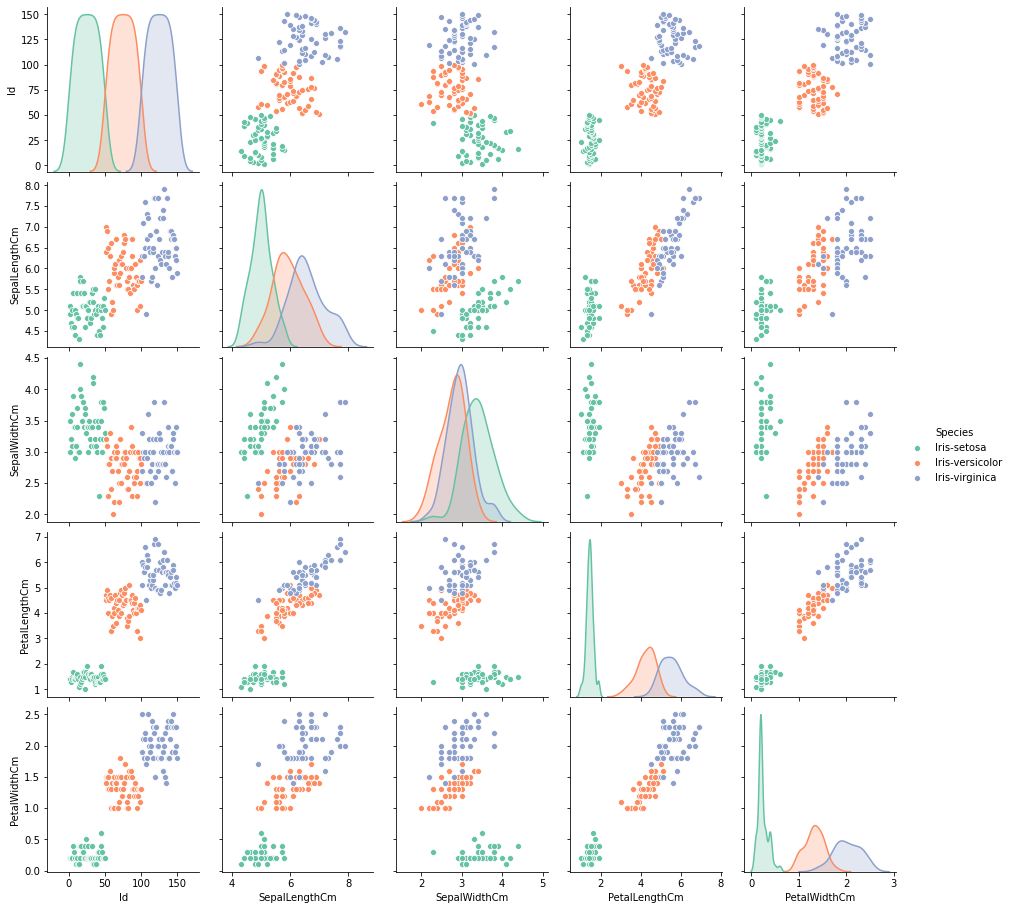

In [6]:
sns.pairplot(data=iris_data,hue="Species",palette="Set2")
plt.show()

We see that iris-setosa is easily separable from the other two. Especially when we can see in different colors for corresponding Labels like above.
But our task was finding the Labels that we didn't knew at all, So Let's create a suitable scenario.

Now we select all four features (sepal length, sepal width, petal length, and petal width) of the dataset in a variable called x so that we can train our model with these features. For this, we use the iloc function on df, and the column index (0,1,2,3) for the above four columns are used, as shown below:

In [7]:
x = iris_data.iloc[:, [0, 1, 2, 3]].values

 Let’s have a look at our data through a scatter plot

Text(0, 0.5, 'Sepal Width')

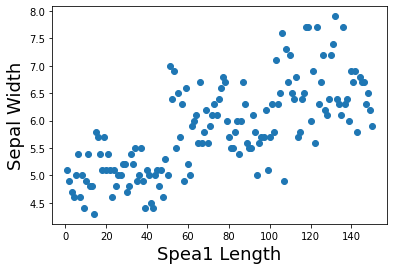

In [8]:
plt.scatter(x[:,0], x[:,1], cmap='gist_rainbow')
plt.xlabel('Spea1 Length', fontsize=18)
plt.ylabel('Sepal Width', fontsize=18)

To start, let’s arbitrarily assign the value of k as 5. We will implement k-means clustering using k=5. For this we will instantiate the KMeans class and assign it to the variable kmeans5:

In [9]:
kmeans5 = KMeans(n_clusters=5)
y_kmeans5 = kmeans5.fit_predict(x)
print(y_kmeans5)

kmeans5.cluster_centers_

[0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 0 4 4 4 4 4 4 4 4
 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 4 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2
 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 2 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1 1
 1 1 1 1 1 1 1 1 1 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3 3
 3 3]


array([[ 15.        ,   5.03793103,   3.45862069,   1.46896552],
       [105.5       ,   6.25333333,   2.85666667,   5.11333333],
       [ 75.        ,   5.95483871,   2.7483871 ,   4.28709677],
       [135.5       ,   6.60666667,   3.01      ,   5.48333333],
       [ 44.5       ,   5.33333333,   3.22      ,   2.34666667]])

Now, you can see the output of the k-means clustering model with k=5. Note that we can find the centers of 5 clusters formed from the data

#### Finding the optimum number of clusters for k-means 

Now let’s use the concept of Inertia which is the sum of the squared distances of samples to their closest cluster centre· If the value of K is huge, then the no. of points within a cluster will be less and hence the inertia will be less

There’s a method called the Elbow method, which is designed to help find the optimal number of clusters in a dataset. So let’s use this method to calculate the optimum value of k. To implement the Elbow method, we need to create some Python code (shown below), and we’ll plot a graph between the number of clusters and the corresponding error value.
This graph generally ends up shaped like an elbow, hence its name

In [10]:
wcss =[]
for i in range(1, 11):
    kmeans = KMeans(n_clusters = i, init = 'k-means++', 
                    max_iter = 300, n_init = 10, random_state = 0)
    kmeans.fit(x)
    wcss.append(kmeans.inertia_)

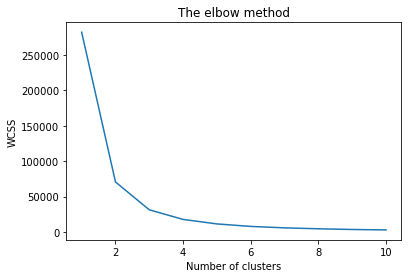

In [11]:
# Plotting the results onto a line graph, `allowing us to observe 'The elbow'
plt.plot(range(1, 11), wcss)
plt.title('The elbow method')
plt.xlabel('Number of clusters')
plt.ylabel('WCSS') # Within cluster sum of squares
plt.show()

The output graph of the Elbow method is shown above. Note that the shape of elbow is approximately formed at k=3.

Let’s implement k-means again using k=3

In [12]:
# Applying kmeans to the dataset / Creating the kmeans classifier
kmeans = KMeans(n_clusters = 3, init = 'k-means++',
                max_iter = 300, n_init = 10, random_state = 0)
y_kmeans = kmeans.fit_predict(x)

In [13]:
centers = kmeans.cluster_centers_
centers

array([[125.5  ,   6.588,   2.974,   5.552],
       [ 25.5  ,   5.006,   3.418,   1.464],
       [ 75.5  ,   5.936,   2.77 ,   4.26 ]])

Finally, its time to visualize the three clusters that were formed with the optimal k value

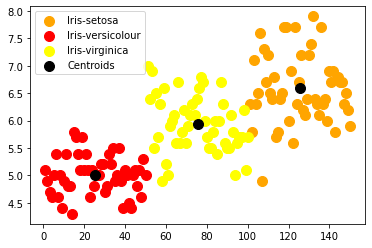

In [15]:
# Visualising the clusters - On the first two columns
plt.scatter(x[y_kmeans == 0, 0], x[y_kmeans == 0, 1], 
            s = 100, c = 'orange', label = 'Iris-setosa')
plt.scatter(x[y_kmeans == 1, 0], x[y_kmeans == 1, 1], 
            s = 100, c = 'red', label = 'Iris-versicolour')
plt.scatter(x[y_kmeans == 2, 0], x[y_kmeans == 2, 1],
            s = 100, c = 'yellow', label = 'Iris-virginica')

# Plotting the centroids of the clusters
plt.scatter(kmeans.cluster_centers_[:, 0], kmeans.cluster_centers_[:,1], 
            s = 100, c = 'black', label = 'Centroids')

plt.legend()

We can clearly see three clusters in the image above, with each cluster represented by a different color with centroids. So, with K=3 we have obtained an optimal distortion/inertia with which we can segment the data into 3 different clusters with minimal error in segmentation